*Script criado por Rafael Cesario de Abreu em Jan/2021 para o curso Aplicações em meteorologia usando Python*

*Revisado por Rita Yuri Ynoue e Natália Machado Crespo*
 

# Aula 1a

Nessa aula veremos os comandos básicos de python:

*   Operações aritméticas simples
*   Criar funções
*   Condicionais  `if/else/elif`
*   Lista 
*   Matrizes com `numpy` e noções de classes em python

**Pacotes**

* **NUMPY:** NumPy é o pacote fundamental para computação científica em Python, contendo um poderoso objeto de matrizes N-dimensionais, ferramentas para integrar com C/C++ e Fortran e capacidade para cálculos em álgebra linear, transformada de Fourier e geração de números aleatórios.


Vamos começar vendo os comandos básicos do python convertendo dados de temperatura entre as escalas Celsius, Farenheit e Kelvin

In [1]:
# valor de temperatura em celsius
tc = 35.1

# para converter para kelvin
tk = tc + 273.15

print(tk)

308.25


In [ ]:
# para converter para farenheit
tf = (tc * 9. / 5.) + 32.

print(tf)

95.18


**Faça você mesmo! Localize no site do [INMET](https://tempo.inmet.gov.br/TabelaEstacoes/A701) a estação mais próxima e verifique a temperatura atual. Quanto será em Kelvin e em Farenheit?** 

Uma coisa importante na hora de escrever o código é tentar não se repetir muito e prezar pela legibilidade do código. Dessa forma, para não repetirmos várias vezes o mesmo comando, vamos construir uma função. Para definir a função, usamos o comando `def` e depois o nome da função, seguido pelos parâmetros que ela leva.

In [2]:
def convert_celsius_to_kelvin(value):
  return value + 273.15 # transforma celsius em kelvin

def convert_celsius_to_farenheit(value):
  return (value * 9. / 5.) + 32. # transforma celsius em farenheit

In [3]:
tk = convert_celsius_to_kelvin(tc)

print(tk)

308.25


**Dica**: Existe um acrônimo no mundo da programação DRY (Don't repeat yourself, não se repita) que você pode lembrar quando estiver escrevendo um código mais complexo e estiver se perguntando "será que ele está bom?"

Podemos simplificar para utilizar apenas uma função que faz todas as conversões se verificarmos as condições das unidades de entrada e saída, usando os condicionais no python:
```
if cond == value1:
  (faz alguma coisa)
elif cond == value2:
  (faz uma segunda coisa)
else:
  (faz outra coisa)
```



In [4]:
def convert_temp(value, input_unit, output_unit):

  # se unidade de input celsius e output kelvin
  if input_unit == 'celsius' and output_unit == 'kelvin':
    output = value + 273.15
  # senão se unidade de input celsius e output farenheit  
  elif input_unit == 'celsius' and output_unit == 'farenheit':
      output = (value * 9. / 5.) + 32.
  elif input_unit == 'kelvin' and output_unit == 'celsius':
      output = value - 273.15
  elif input_unit == 'kelvin' and output_unit == 'farenheit':
      output = ((value - 273.15) * 9. / 5.) + 32.
  elif input_unit == 'farenheit' and output_unit == 'celsius':
      output = (value - 32) * 5. / 9.
  elif input_unit == 'farenheit' and output_unit == 'kelvin':
      output = (value - 32) * 5. / 9. + 273.15
  # se opção for invalida imprime uma mensagem e atribui o valor None
  else:
      output = None
      # Aqui eu uso o conceito das f-strings que é uma forma simples de
      # passar variáveis para serem renderizadas dentro de uma string
      print(f'No conversion found from {input_unit} to {output_unit}.')

  return output

Vamos testar agora. Primeiramente uma conversão de 'celsius' para 'kelvin'

In [5]:
tk = convert_temp(tc, 'celsius', 'kelvin')

print(tk)

308.25


Agora de 'kelvin' para 'farenheit'

In [6]:
tf = convert_temp(tk, 'kelvin', 'farenheit')

print(tf)

95.18000000000004


E finalmente vamos retornar o valor para celsius

In [7]:
tc = convert_temp(tf, 'farenheit', 'celsius')

print(tc)

35.10000000000002


Agora vamos testar o bloco do `else` para ver se a mensagem está certa

In [8]:
tk = convert_temp(tc, 'celsius', 'keuvin')

No conversion found from celsius to keuvin.


E se quisermos fazer a conversão de mais de um valor? Podemos usar uma lista para definir os valores e um `for` para aplicar a função em cada um deles

In [9]:
# valores em celsius
tc = [35, 22, 17, 14.5]

# valores em kelvin começa com uma lista vazia
tk = []

for value in tc:
    # valor é convertido de celsius para kelvin
    output_value = convert_temp(value, 'celsius', 'kelvin')

    # valor convertido é adicionado a lista
    tk.append(output_value)

print(tk)

[308.15, 295.15, 290.15, 287.65]


Podemos ainda utilizar a biblioteca `numpy` que permite que façamos cálculos de forma vetorizada. Para importarmos um pacote fazemos:

In [10]:
import numpy as np

O `as np` significa que para cada função ou classe em que eu chamar o `numpy`, em vez de escrever `numpy.`, eu posso fazer `np.`, o que fica mais rápido na hora de escrever o código. Convertemos então a lista `tc` para um objeto do tipo `numpy.ndarray`

In [11]:
tc_arr = np.array(tc)

# aplicamos a conversão de uma vez só dessa forma
tk_arr = convert_temp(tc_arr, 'celsius', 'kelvin')

print(tk_arr)

[308.15 295.15 290.15 287.65]


E no fim, o que é um objeto? Um objeto é constituido de atributos, que são basicamente características do objeto, assim como métodos, que são coisas que pedimos para o objeto fazer. No exemplo da figura abaixo, vemos alguns atributos do objeto `Dog` como nome, raça e tamanho, assim como alguns métodos como 'pegar' (=fetch) e 'se fingir de morto' (=play_dead). A estrutura básica de um objeto é dada a seguir.

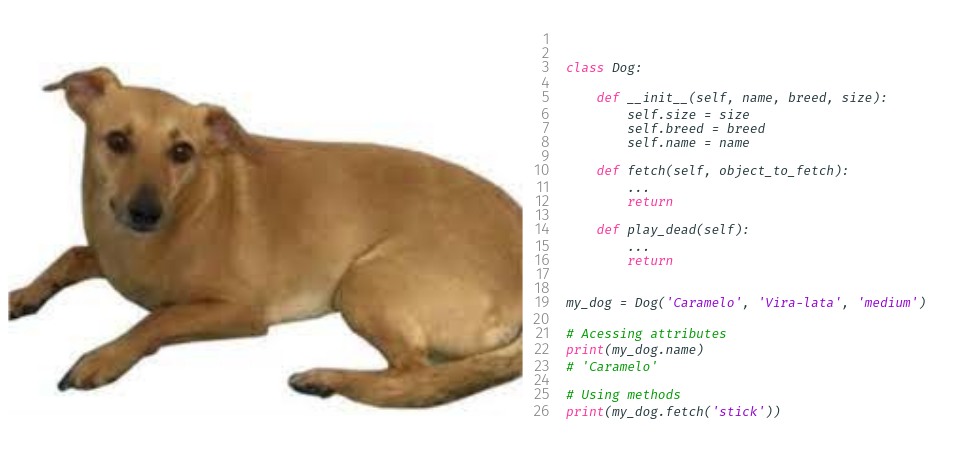

No caso de `numpy.ndarray` ou outros objetos que vamos ver ao longo do curso isso se torna mais abstrato. Por exemplo, o *array* do `numpy` tem alguns atributos como `shape` para mostrar o tamanho e `ndim` para mostrar o número de dimensões 

In [12]:
print(tc_arr.shape)  # tamanho do array

(4,)


In [13]:
print(tc_arr.ndim) # dimensão do array

1


Assim como alguns métodos como `mean` para calcular a média e `std` para calcular o desvio padrão

In [14]:
print(tc_arr.mean()) # média do array

22.125


In [15]:
print(tc_arr.std()) # desvio padrão do array

7.90865823006659


**Exercício:** Dada uma série diária de $u$ e $v$, as componentes zonal e meridional da velocidade do vento, respectivamente, faça um programa que calcule a média, desvio padrão e curtose da velocidade do vento. Para isso, execute os seguintes passos:

1. Crie a função `wind_velocity` que determina a velocidade do vento e use-a para o cálculo (utilize o `np.sqrt` para calcular a raiz quadrada).
2. Calcule as estatísticas básicas (média, desvio padrão, mínimo e máximo) usando o `numpy`.
3. Calcule novamente a velocidade média do vento mas dessa vez a partir da média de $u$ e a média de $v$. O resultado é igual ao anterior? 
4. Faça um `for` em cada um dos dias e determine em quantos dias o vento é menor que 0.1

**Extra**: Há um modo de fazer o exercício 4 (contar os valores abaixo de 0.1) sem fazer o `for`?




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
u = np.loadtxt('/content/drive/Shareddrives/Curso_Python2022/u.txt')
v = np.loadtxt('/content/drive/Shareddrives/Curso_Python2022/v.txt')